In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import matplotlib
%matplotlib inline

In [8]:
df = pd.read_csv('soccer_data.csv')

In [9]:
df.isnull().sum()

team            0
ranking         0
games           0
wins            0
draws           0
losses          0
goalsFor        0
goalsAgainst    0
yellowCards     0
redCards        0
dtype: int64

In [10]:
df.head()

,team,ranking,games,wins,draws,losses,goalsFor,goalsAgainst,yellowCards,redCards
0,Team_1,39,39,19,1,13,69,38,4,3
1,Team_2,29,15,23,3,3,50,37,9,4
2,Team_3,15,11,16,6,13,38,52,6,4
3,Team_4,43,37,27,7,14,24,59,14,2
4,Team_5,8,30,24,2,14,54,27,13,4


In [11]:
df.describe()

,ranking,games,wins,draws,losses,goalsFor,goalsAgainst,yellowCards,redCards
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,23.850000,28.100000,18.700000,4.050000,9.050000,36.550000,33.750000,8.800000,2.800000
std,13.128013,9.402687,7.197222,2.981963,4.135533,20.441122,15.484712,4.335897,1.151658
min,2.000000,10.000000,7.000000,0.000000,1.000000,10.000000,5.000000,0.000000,0.000000
25%,14.000000,21.000000,12.500000,1.000000,6.750000,17.750000,26.750000,6.000000,2.000000
50%,23.500000,30.500000,20.500000,3.000000,8.500000,37.500000,38.500000,9.000000,3.000000
75%,36.750000,36.250000,24.250000,6.250000,13.000000,50.000000,41.750000,12.250000,4.000000
max,44.000000,39.000000,29.000000,9.000000,14.000000,74.000000,59.000000,14.000000,4.000000


In [12]:
df.insert(8, "GD", df.goalsFor - df.goalsAgainst)

In [13]:
#is meant to calculate teams with positive GD

for index, row in df.iterrows():
    if (row ['GD'] > 0):
        print(row ['team'], "has positive GD")

Team_1 has positive GD
Team_2 has positive GD
Team_5 has positive GD
Team_6 has positive GD
Team_10 has positive GD
Team_13 has positive GD
Team_14 has positive GD
Team_15 has positive GD
Team_18 has positive GD
Team_19 has positive GD
Team_20 has positive GD


In [14]:
df['GD'].mean()

2.8

In [15]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr(method = 'pearson')

,ranking,games,wins,draws,losses,goalsFor,goalsAgainst,GD,yellowCards,redCards
ranking,1.000000,0.111413,-0.123606,0.200525,-0.032815,-0.024781,-0.066216,0.021024,0.159406,-0.099561
games,0.111413,1.000000,-0.277183,0.151859,-0.111124,0.050358,0.045366,0.013247,-0.036922,-0.338283
wins,-0.123606,-0.277183,1.000000,0.236160,0.394856,0.089544,-0.148997,0.167675,0.279632,-0.236211
draws,0.200525,0.151859,0.236160,1.000000,0.153430,-0.288005,-0.191207,-0.118592,0.269478,-0.242146
losses,-0.032815,-0.111124,0.394856,0.153430,1.000000,-0.196462,0.029793,-0.181441,0.414449,-0.251957
goalsFor,-0.024781,0.050358,0.089544,-0.288005,-0.196462,1.000000,0.076946,0.780095,-0.157840,0.302270
goalsAgainst,-0.066216,0.045366,-0.148997,-0.191207,0.029793,0.076946,1.000000,-0.563781,0.198328,0.280378
GD,0.021024,0.013247,0.167675,-0.118592,-0.181441,0.780095,-0.563781,1.000000,-0.255207,0.074452
yellowCards,0.159406,-0.036922,0.279632,0.269478,0.414449,-0.157840,0.198328,-0.255207,1.000000,-0.229774
redCards,-0.099561,-0.338283,-0.236211,-0.242146,-0.251957,0.302270,0.280378,0.074452,-0.229774,1.000000


In [16]:
avg_reds = df['redCards'].mean()
print("The average reds is =", avg_reds)
for index, row in df.iterrows():
    if(row ['redCards'] > avg_reds):
        print(row['team'], "has more reds than average")

The average reds is = 2.8
Team_1 has more reds than average
Team_2 has more reds than average
Team_3 has more reds than average
Team_5 has more reds than average
Team_6 has more reds than average
Team_7 has more reds than average
Team_10 has more reds than average
Team_13 has more reds than average
Team_15 has more reds than average
Team_16 has more reds than average
Team_17 has more reds than average
Team_18 has more reds than average
Team_19 has more reds than average
Team_20 has more reds than average


In [17]:
avg_goals = df['goalsFor'].mean()

print("The average goals is:", avg_goals)

for index, row in df.iterrows():
    if(row['goalsFor'] > avg_goals):
        print(row['team'], "has more goals than average")

The average goals is: 36.55
Team_1 has more goals than average
Team_2 has more goals than average
Team_3 has more goals than average
Team_5 has more goals than average
Team_6 has more goals than average
Team_10 has more goals than average
Team_13 has more goals than average
Team_14 has more goals than average
Team_15 has more goals than average
Team_17 has more goals than average
Team_18 has more goals than average


In [18]:
worst_def = df['goalsAgainst'].max()

print("The most goals condeded:", worst_def)

for index, row in df.iterrows():
    if(worst_def == row['goalsAgainst']):
        print(row['team'], "has the worst defense")

The most goals condeded: 59
Team_4 has the worst defense


In [19]:
best_def = df['goalsAgainst'].min()

print("The least goals conceded:", best_def)

for index, row in df.iterrows():
    if(row['goalsAgainst'] == best_def):
        print(row['team'], "has the best defense")

The least goals conceded: 5
Team_14 has the best defense
Team_20 has the best defense


In [20]:
ranking_games_corr = df[['ranking', 'yellowCards', 'redCards', 'GD']].corr()

ranking_games_corr

,ranking,yellowCards,redCards,GD
ranking,1.000000,0.159406,-0.099561,0.021024
yellowCards,0.159406,1.000000,-0.229774,-0.255207
redCards,-0.099561,-0.229774,1.000000,0.074452
GD,0.021024,-0.255207,0.074452,1.000000


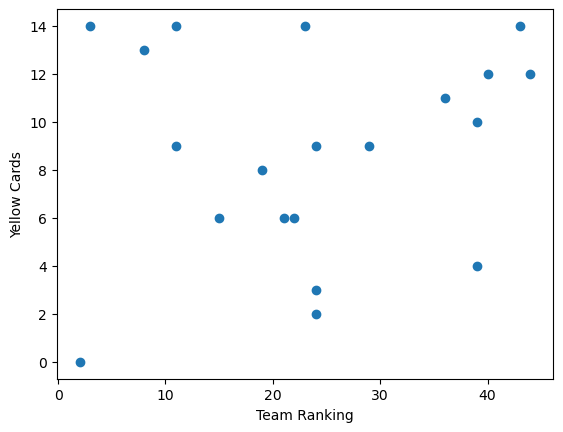

In [21]:
plt.scatter(df['ranking'],df['yellowCards'])

plt.xlabel("Team Ranking")
plt.ylabel("Yellow Cards")

plt.show()

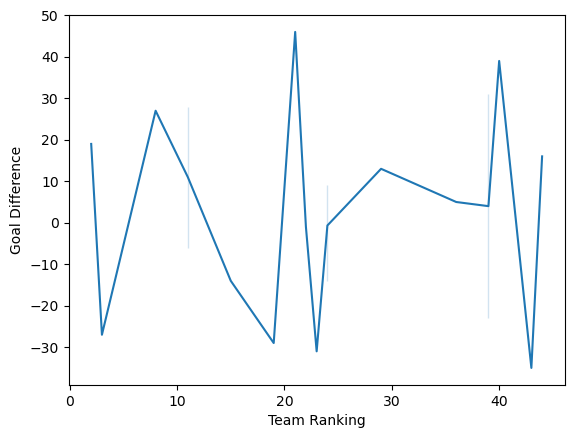

In [22]:
sns.lineplot(x = 'ranking', y = 'GD', data = df)

plt.xlabel("Team Ranking")
plt.ylabel("Goal Difference")

plt.show()

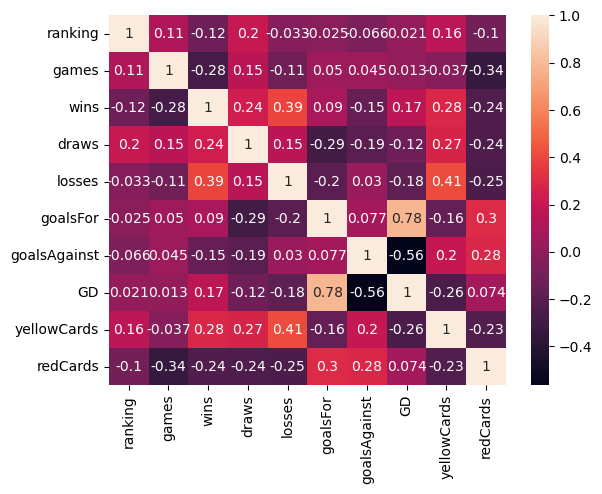

In [23]:
sns.heatmap(df_numeric.corr(), annot=True)

plt.show()

#red cards do not equate a higher probability of losing
# yellow cards do not mean a higher chance of getting a red

In [25]:
corr_values = df_numeric.corr()

corr_pairs = corr_values.unstack()

corr_pairs

ranking   ranking         1.000000
          games           0.111413
          wins           -0.123606
          draws           0.200525
          losses         -0.032815
                            ...   
redCards  goalsFor        0.302270
          goalsAgainst    0.280378
          GD              0.074452
          yellowCards    -0.229774
          redCards        1.000000
Length: 100, dtype: float64